**Experiment 2 : CNN**



Loading the images from local directories

In [26]:
#just the libraries to load images
import cv2
from os import listdir
from tensorflow.keras.preprocessing.image import img_to_array

#setting some image parameters
default_img_size = (128,128)
root_dir = r"/content/drive/MyDrive/bean_leaf_dataset"


In [34]:
#numpy for array functionalities
import numpy as np
#function to convert an image into an array
def image_to_array(img_src):
  img = cv2.imread(img_src)
  if img is not None:
    img = cv2.resize(img,default_img_size)
    img_arr = img_to_array(img)
  else:
    return None
  return img_arr

In [40]:
#keras.util.image.datasets_from_directory

img_arr_list = []
img_labels_list = []

#iterating through directories and passing the relevant images to the conversion function
for folder in listdir(root_dir):
  for folder1 in listdir(root_dir+"/"+folder):
    for types in listdir(root_dir+"/"+folder+"/"+folder1):
      for img_t in listdir(root_dir+"/"+folder+"/"+folder1+"/"+types):
        img_arr = image_to_array(str(root_dir+"/"+folder+"/"+folder1+"/"+types+"/"+img_t))
        if img_arr is not None:
          img_arr_list.append(img_arr)
          img_labels_list.append(types)

Label the images with a binarizer and split the loaded data

In [41]:
from sklearn.preprocessing import LabelBinarizer
binarizer = LabelBinarizer()
labels = binarizer.fit_transform(img_labels_list)
print(binarizer.classes_)

for i, img in enumerate(img_arr_list):
    print(f"Image {i} shape: {img.shape}")

img_arr_list = np.array(img_arr_list, dtype= np.float32)/255.0

['angular_leaf_spot' 'bean_rust' 'healthy']
Image 0 shape: (128, 128, 3)
Image 1 shape: (128, 128, 3)
Image 2 shape: (128, 128, 3)
Image 3 shape: (128, 128, 3)
Image 4 shape: (128, 128, 3)
Image 5 shape: (128, 128, 3)
Image 6 shape: (128, 128, 3)
Image 7 shape: (128, 128, 3)
Image 8 shape: (128, 128, 3)
Image 9 shape: (128, 128, 3)
Image 10 shape: (128, 128, 3)
Image 11 shape: (128, 128, 3)
Image 12 shape: (128, 128, 3)
Image 13 shape: (128, 128, 3)
Image 14 shape: (128, 128, 3)
Image 15 shape: (128, 128, 3)
Image 16 shape: (128, 128, 3)
Image 17 shape: (128, 128, 3)
Image 18 shape: (128, 128, 3)
Image 19 shape: (128, 128, 3)
Image 20 shape: (128, 128, 3)
Image 21 shape: (128, 128, 3)
Image 22 shape: (128, 128, 3)
Image 23 shape: (128, 128, 3)
Image 24 shape: (128, 128, 3)
Image 25 shape: (128, 128, 3)
Image 26 shape: (128, 128, 3)
Image 27 shape: (128, 128, 3)
Image 28 shape: (128, 128, 3)
Image 29 shape: (128, 128, 3)
Image 30 shape: (128, 128, 3)
Image 31 shape: (128, 128, 3)
Image 

In [42]:
print(labels)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [43]:
len(img_arr_list)

1295

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(img_arr_list,labels,test_size=0.2,random_state=18,shuffle=True)

In [45]:
#checking for the dimensions
print(f"x_train - {x_train.shape} y_train - {y_train.shape}")
print(f"x_test - {x_test.shape} y_test - {y_test.shape}")

x_train - (1036, 128, 128, 3) y_train - (1036, 3)
x_test - (259, 128, 128, 3) y_test - (259, 3)


Deep Neural Network Model


In [67]:
import tensorflow as tf

#define the model architecture
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128,128,3)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [68]:
#compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

#works as well
#model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
#just check the number of parameters
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 49152)             0         
                                                                 
 dense_15 (Dense)            (None, 128)               6291584   
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dense_18 (Dense)            (None, 256)               33024     
                                                                 
 dense_19 (Dense)            (None, 3)                 771       
                                                                 
Total params: 6358403 (24.26 MB)
Trainable params: 635

In [70]:
model_history = model.fit(x_train,y_train,epochs=60,validation_data = (x_test,y_test),verbose=1)

Epoch 1/60
33/33 [==============================] - 4s 89ms/step - loss: 2.2617 - accuracy: 0.3784 - val_loss: 1.0970 - val_accuracy: 0.4942
Epoch 2/60
33/33 [==============================] - 3s 82ms/step - loss: 1.0268 - accuracy: 0.4913 - val_loss: 0.9644 - val_accuracy: 0.5174
Epoch 3/60
33/33 [==============================] - 3s 80ms/step - loss: 0.8977 - accuracy: 0.5656 - val_loss: 1.0227 - val_accuracy: 0.5328
Epoch 4/60
33/33 [==============================] - 3s 102ms/step - loss: 0.7994 - accuracy: 0.6264 - val_loss: 0.7817 - val_accuracy: 0.7104
Epoch 5/60
33/33 [==============================] - 5s 141ms/step - loss: 0.7651 - accuracy: 0.6573 - val_loss: 0.7450 - val_accuracy: 0.6988
Epoch 6/60
33/33 [==============================] - 4s 120ms/step - loss: 0.7626 - accuracy: 0.6515 - val_loss: 0.8650 - val_accuracy: 0.6564
Epoch 7/60
33/33 [==============================] - 6s 172ms/step - loss: 0.7371 - accuracy: 0.6718 - val_loss: 0.8428 - val_accuracy: 0.5676
Epoch 8/6

Visualize the progress of accuracy

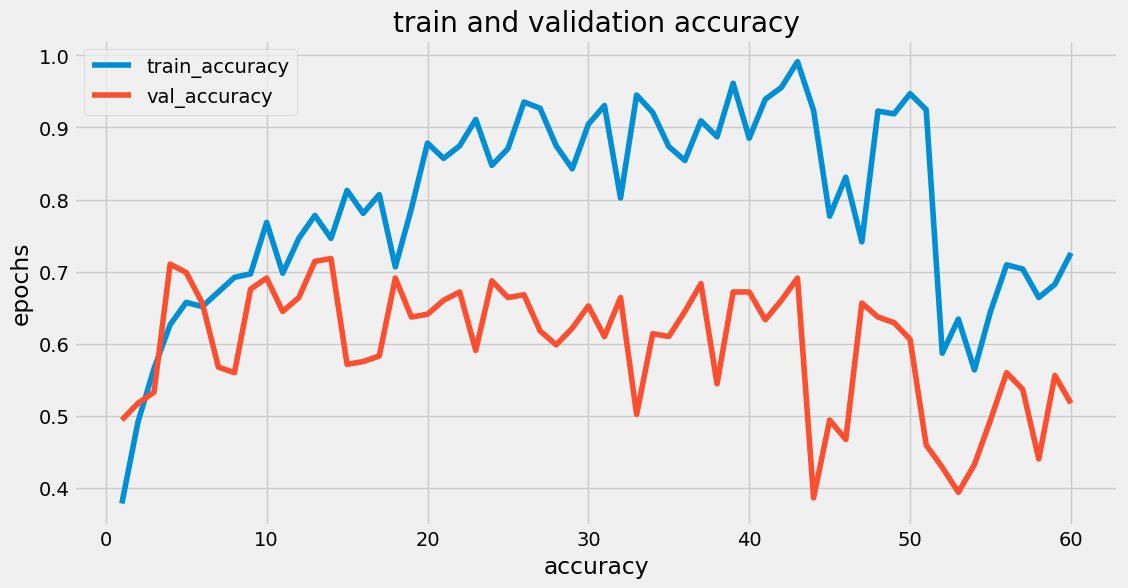

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.style.use("fivethirtyeight")
epochs=range(1,61)
sns.lineplot(x=epochs,y=model_history.history['accuracy'],label='train_accuracy')
sns.lineplot(x=epochs,y=model_history.history['val_accuracy'],label='val_accuracy')

plt.title("train and validation accuracy")
plt.xlabel("accuracy")
plt.ylabel("epochs")
plt.legend()

Prediction and evaluation


In [76]:
y_pred = model.predict(x_test)
y_pred.shape

9/9 [==============================] - 0s 13ms/step


(259, 3)

In [77]:
y_pred = np.argmax(y_pred,axis=1)
y_pred.shape

(259,)

In [78]:
#choosing the appopriate clas
y_true=y_test.argmax(axis=1)
y_true.shape

(259,)

In [81]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.39      0.47      0.43        87
           1       0.67      0.43      0.53        90
           2       0.56      0.66      0.60        82

    accuracy                           0.52       259
   macro avg       0.54      0.52      0.52       259
weighted avg       0.54      0.52      0.52       259



<Axes: >

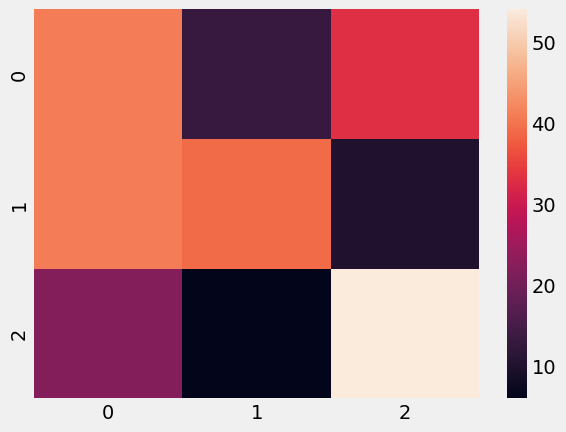

In [84]:
sns.heatmap(confusion_matrix(y_true,y_pred))

CNN model

In [89]:
import tensorflow as tf
from tensorflow.keras import layers, models

#define the architecture
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])

#compile
model_cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','Precision'])

#check the summary
model_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 128)      

In [92]:
cnn_history = model_cnn.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
33/33 [==============================] - 41s 1s/step - loss: 0.1057 - accuracy: 0.9604 - precision: 0.9622 - val_loss: 1.3247 - val_accuracy: 0.7027 - val_precision: 0.7054
Epoch 2/10
33/33 [==============================] - 41s 1s/step - loss: 0.1189 - accuracy: 0.9633 - precision: 0.9643 - val_loss: 1.0895 - val_accuracy: 0.7336 - val_precision: 0.7451
Epoch 3/10
33/33 [==============================] - 39s 1s/step - loss: 0.0444 - accuracy: 0.9884 - precision: 0.9894 - val_loss: 1.6117 - val_accuracy: 0.6988 - val_precision: 0.6977
Epoch 4/10
33/33 [==============================] - 41s 1s/step - loss: 0.0486 - accuracy: 0.9865 - precision: 0.9865 - val_loss: 1.3305 - val_accuracy: 0.7336 - val_precision: 0.7373
Epoch 5/10
33/33 [==============================] - 38s 1s/step - loss: 0.0404 - accuracy: 0.9894 - precision: 0.9903 - val_loss: 1.5308 - val_accuracy: 0.7529 - val_precision: 0.7529
Epoch 6/10
33/33 [==============================] - 43s 1s/step - loss: 0.0484 -

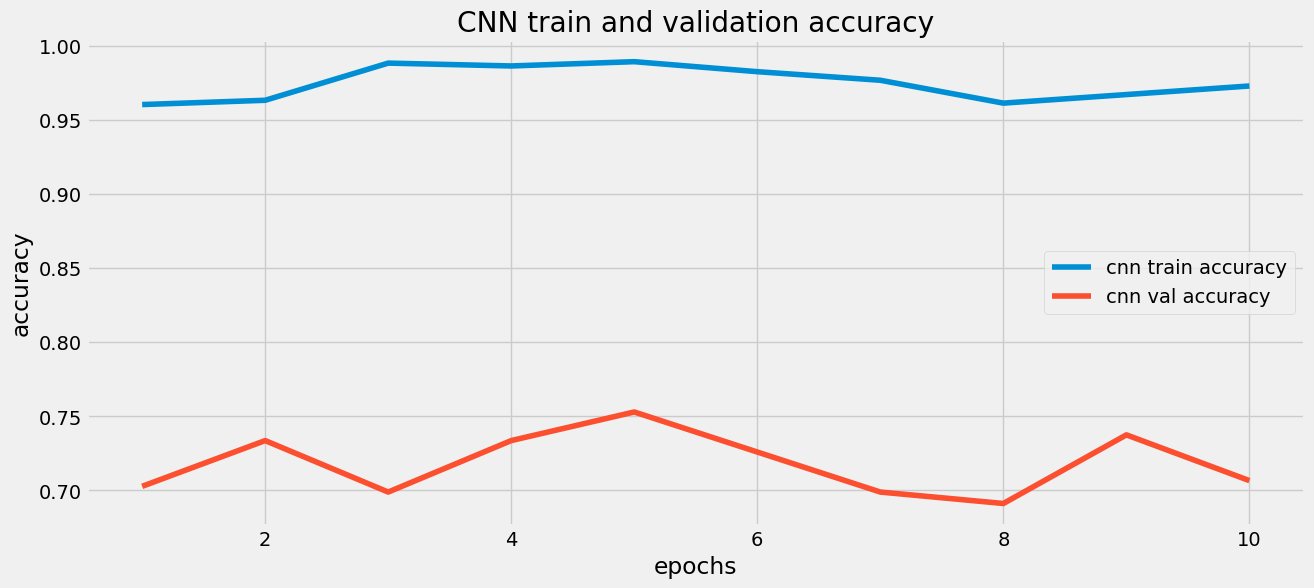

In [95]:
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
plt.title("CNN train and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

epochs = range(1,11)
sns.lineplot(x=epochs,y=cnn_history.history['accuracy'],label='cnn train accuracy')
sns.lineplot(x=epochs,y=cnn_history.history['val_accuracy'],label='cnn val accuracy')

plt.legend()

Comparison between DNN and CNN

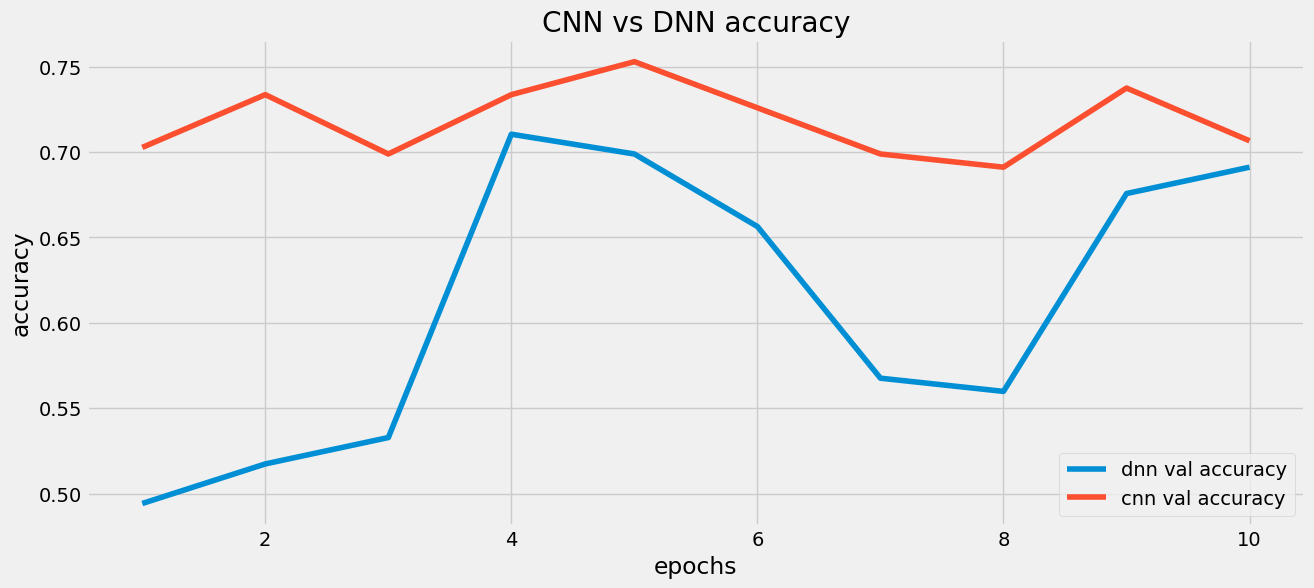

In [101]:
plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
plt.title("CNN vs DNN accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

epochs = range(1,11)
dnn_val = model_history.history['val_accuracy'][:10]
sns.lineplot(x=epochs,y=dnn_val,label='dnn val accuracy')
sns.lineplot(x=epochs,y=cnn_history.history['val_accuracy'],label='cnn val accuracy')

plt.legend()